6 Ways to Plot Your Time Series Data with Python

In this tutorial, we will take a look at 6 different types of visualizations that you can use on your own time series data. They are:

- Line Plots.
- Histograms and Density Plots.
- Box and Whisker Plots.
- Heat Maps.
- Lag Plots or Scatter Plots.
- Autocorrelation Plots.
- The focus is on univariate time series, but the techniques are just as applicable to multivariate time series, when you have more than one observation at each time step.

Next, let’s take a look at the dataset we will use to demonstrate time series visualization in this tutorial.


**Minimum Daily Temperatures Dataset**

This dataset describes the minimum daily temperatures over 10 years (1981-1990) in the city Melbourne, Australia.

The units are in degrees Celsius and there are 3,650 observations. The source of the data is credited as the Australian Bureau of Meteorology.

Download the dataset and place it in the current working directory with the filename “daily-minimum-temperatures.csv“.

Note: The downloaded file contains some question mark (“?”) characters that must be removed before you can use the dataset. Open the file in a text editor and remove the “?” characters. Also remove any footer information in the file.

Below is an example of loading the dataset as a Panda Series.

In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
import pandas
from pandas import Series
from matplotlib import pyplot
series = pandas.read_csv('daily-minimum-temperatures-me.csv', header=0)
#series = Series.from_csv('daily-minimum-temperatures-me.csv', header=0) from_csv deprecated
print(series.head())

         Date  Daily minimum temperatures in Melbourne, Australia, 1981-1990
0  1981-01-01                                               20.7            
1  1981-01-02                                               17.9            
2  1981-01-03                                               18.8            
3  1981-01-04                                               14.6            
4  1981-01-05                                               15.8            


#  Time Series Line Plot

The first, and perhaps most popular, visualization for time series is the line plot.

In this plot, time is shown on the x-axis with observation values along the y-axis.

Below is an example of visualizing the Pandas Series of the Minimum Daily Temperatures dataset directly as a line plot.

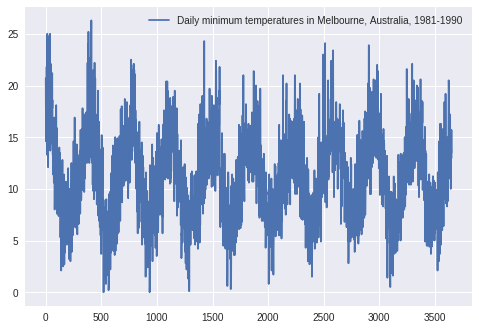

In [0]:
series.plot()
pyplot.show()

The line plot is quite dense.

Sometimes it can help to change the style of the line plot; for example, to use a dashed line or dots.

Below is an example of changing the style of the line to be black dots instead of a connected line (the style=’k.’ argument).

We could change this example to use a dashed line by setting style to be ‘k–‘.

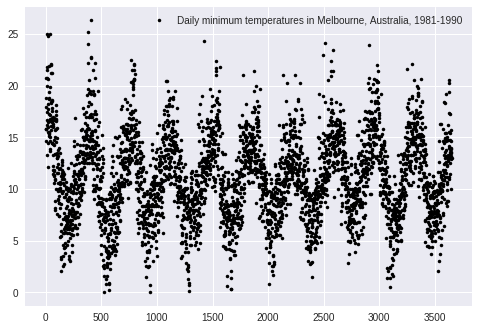

In [0]:
series.plot(style='k.')
pyplot.show()

It can be helpful to compare line plots for the same interval, such as from day-to-day, month-to-month, and year-to-year.

The Minimum Daily Temperatures dataset spans 10 years. We can group data by year and create a line plot for each year for direct comparison.

The example below shows how to do this. First the observations are grouped by year (series.groupby(TimeGrouper(‘A’))).

The groups are then enumerated and the observations for each year are stored as columns in a new DataFrame.

Finally, a plot of this contrived DataFrame is created with each column visualized as a subplot with legends removed to cut back on the clutter.

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


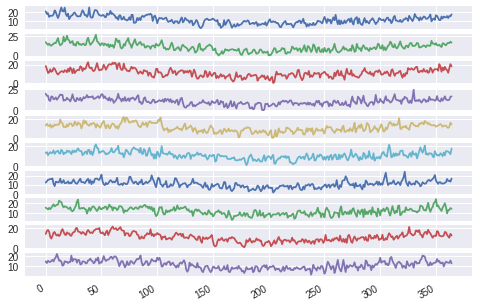

In [0]:
from pandas import Series
from pandas import DataFrame
# from pandas import TimeGrouper
from pandas import Grouper
from matplotlib import pyplot
series = Series.from_csv('daily-minimum-temperatures-me.csv', header=0)
#series = pandas.read_csv('daily-minimum-temperatures-me.csv', index_col=False, header=0)

groups = series.groupby(Grouper(freq='A'))
#groups = series.groupby(TimeGrouper('A')) TmeGRouper deprecated
years = DataFrame()
for name, group in groups:
	years[name.year] = group.values
years.plot(subplots=True, legend=False)
pyplot.show()

# Time Series Histogram and Density Plots


Another important visualization is of the distribution of observations themselves.

This means a plot of the values without the temporal ordering.

The example below creates a histogram plot of the observations in the Minimum Daily Temperatures dataset. A histogram groups values into bins, and the frequency or count of observations in each bin can provide insight into the underlying distribution of the observations.


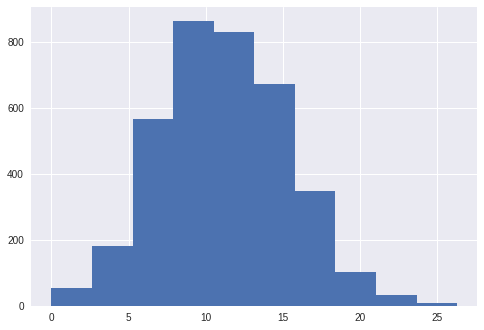

In [0]:
series.hist()
pyplot.show()

We can get a better idea of the shape of the distribution of observations by using a density plot.

This is like the histogram, except a function is used to fit the distribution of observations and a nice, smooth line is used to summarize this distribution.

Below is an example of a density plot of the Minimum Daily Temperatures dataset.

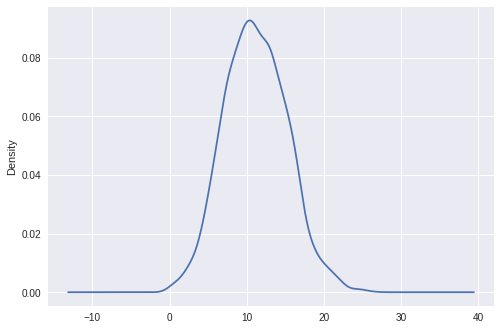

In [0]:
series.plot(kind='kde')
pyplot.show()

# Time Series Box and Whisker Plots by Interval

Histograms and density plots provide insight into the distribution of all observations, but we may be interested in the distribution of values by time interval.

Another type of plot that is useful to summarize the distribution of observations is the box and whisker plot. This plot draws a box around the 25th and 75th percentiles of the data that captures the middle 50% of observations. A line is drawn at the 50th percentile (the median) and whiskers are drawn above and below the box to summarize the general extents of the observations. Dots are drawn for outliers outside the whiskers or extents of the data.

Box and whisker plots can be created and compared for each interval in a time series, such as years, months, or days.

Below is an example of grouping the Minimum Daily Temperatures dataset by years, as was done above in the plot example. A box and whisker plot is then created for each year and lined up side-by-side for direct comparison.

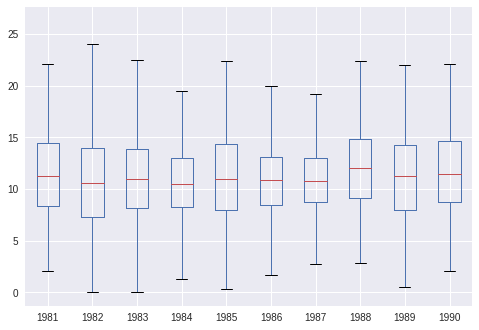

In [0]:
from pandas import Grouper
groups = series.groupby(Grouper(freq='A'))
#groups = series.groupby(TimeGrouper('A')) #deprecated
years = DataFrame()
for name, group in groups:
	years[name.year] = group.values
years.boxplot()
pyplot.show()

# Time Series Heat Maps

A matrix of numbers can be plotted as a surface, where the values in each cell of the matrix are assigned a unique color.

This is called a heatmap, as larger values can be drawn with warmer colors (yellows and reds) and smaller values can be drawn with cooler colors (blues and greens).

Like the box and whisker plots, we can compare observations between intervals using a heat map.

In the case of the Minimum Daily Temperatures, the observations can be arranged into a matrix of year-columns and day-rows, with minimum temperature in the cell for each day. A heat map of this matrix can then be plotted.

Below is an example of creating a heatmap of the Minimum Daily Temperatures data. The matshow() function from the matplotlib library is used as no heatmap support is provided directly in Pandas.

For convenience, the matrix is rotation (transposed) so that each row represents one year and each column one day. This provides a more intuitive, left-to-right layout of the data.

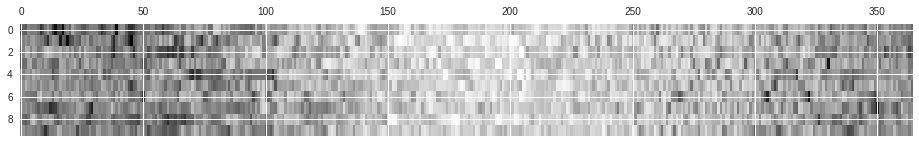

In [0]:
years = DataFrame()
for name, group in groups:
	years[name.year] = group.values
years = years.T
pyplot.matshow(years, interpolation=None, aspect='auto')
pyplot.show()

Below is an example of a heat map comparing the months of the year in 1990. Each column represents one month, with rows representing the days of the month from 1 to 31.

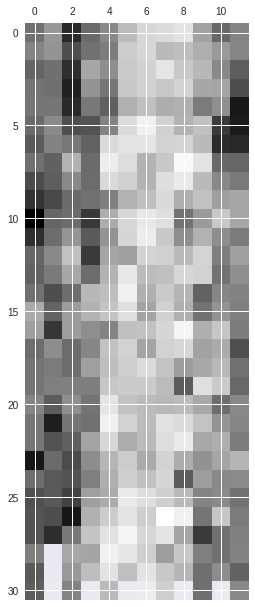

In [0]:
from pandas import concat
one_year = series['1990']
groups = one_year.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,13)
pyplot.matshow(months, interpolation=None, aspect='auto')
pyplot.show()

# Time Series Lag Scatter Plots